## Portfolio Construction

In [1]:
import yfinance as yf
from yahooquery import Ticker
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyportfolio import Portfolio, Allocation

We created two classes, Portfolio and Allocation.

Let's build a simple portfolio with a Stock ETF and a Bond ETF

1. SPY (S&P 500 Tracking ETF)
2. IGIB (iShares Trust 5-10 year investment Grade Corporate Bond ETF)

In [2]:
#the asset symbol and how much we want to allocate for our portfolio
stock_etf = Allocation("SPY",0.5,"STOCK_ETF")
bond_etf = Allocation('IGIB',0.2,"BOND_ETF")
bac = Allocation("BAC",0.1,"STOCK")
wmt = Allocation("WMT",0.1,"STOCK")
jnj = Allocation("JNJ",0.1,"STOCK")

#name portfolio Growth and place in risk bucket 4
myPortfolio = Portfolio("Core", 3)
myPortfolio.allocations.append(stock_etf)
myPortfolio.allocations.append(bond_etf)
myPortfolio.allocations.append(bac)
myPortfolio.allocations.append(wmt)
myPortfolio.allocations.append(jnj)


In [3]:
for i in myPortfolio.allocations:
    print(i.ticker)

SPY
IGIB
BAC
WMT
JNJ


## Analyze Portfolio

To understand the diversification of our portfolio we can look at:
1. Asset Class
2. Asset Industry (Sector)
3. Asset Region
and others, but for simplicity we will stick with these three.

In [4]:
market = myPortfolio.get_market()
class_alloc = myPortfolio.get_class_alloc()

In [5]:
#no longer provided by yfinance package
#using yahooquery instead
df = Ticker('SPY').fund_sector_weightings
df.reset_index(inplace=True)

sector_weights = df[df.columns[1]]
sector_labels = df[df.columns[0]]

# plt.pie(sector_weights, labels = sector_labels)
# plt.show()

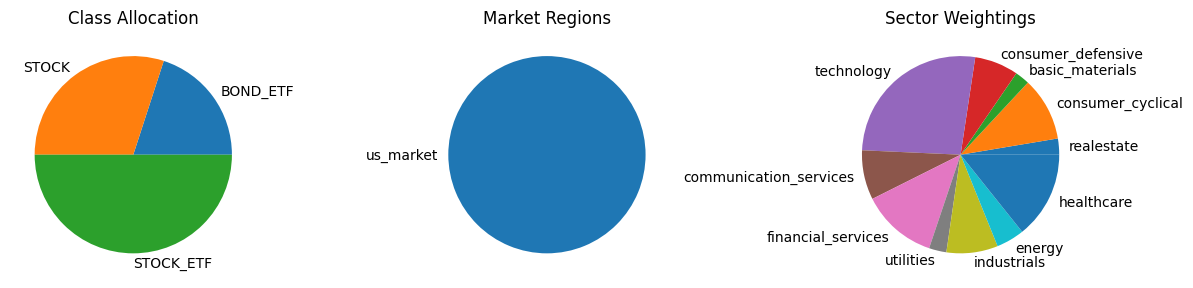

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,10))
# plot the first pie chart on the first axes
ax1.pie(class_alloc['Weight'],labels=class_alloc['Type'])
ax1.set_title("Class Allocation")
# plot the second pie chart on the second axes
ax2.pie(market['weight'],labels=market.index)
ax2.set_title("Market Regions")

#plot sector weightings for Stock ETF
ax3.pie(sector_weights, labels = sector_labels)
ax3.set_title("Sector Weightings")

#modify layout
fig.tight_layout()
# show the figure
plt.show()

## Visualizing the Efficient Frontier Model

In [7]:
data = yf.download("SPY IGIB BAC WMT JNJ", group_by="Ticker", period="20y")

[*********************100%***********************]  5 of 5 completed


In [8]:
data = data.iloc[:,data.columns.get_level_values(1)=="Close"]
data.dropna(inplace=True)
data.columns = data.columns.droplevel(1)
data.head()

,SPY,JNJ,IGIB,WMT,BAC
Date,,,,,
2007-01-11,142.160004,66.730003,50.125000,47.599998,53.259998
2007-01-12,143.240005,66.639999,50.055000,47.980000,53.380001
2007-01-16,142.960007,66.540001,50.110001,48.310001,53.439999
2007-01-17,143.020004,66.870003,50.110001,48.200001,53.320000
2007-01-18,142.539993,67.709999,50.080002,48.389999,53.290001


In [9]:
spy = yf.Ticker("SPY")
gsig = yf.Ticker("GSIG")